In [1]:
%matplotlib inline
import numpy as np
import os
import threading
import operator
import pickle
import re
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import stats
import operator
import scipy.stats


start_time = 1190146243
end_time = 1192994591

In [2]:
def dump_data(data, output_name):
    with open(output_name, 'wb') as f:
        pickle.dump(data, f)

def load_data(input_name):
    with open(input_name, 'rb') as f:
        data = pickle.load(f)
    return data

In [3]:
revisions_record = load_data('data/dump/revision_records.pkl')

In [83]:
times = load_data('data/dump/word_access_timestamps_00000-01000.pkl')

In [84]:
keys=times.keys()

In [85]:
key_list=list(times.keys())

In [86]:
def my_range(start, end, step):
    while start <= end:
        yield start
        start += step

## calucate the peak between the visits

In [ ]:
peak_visit=[]

In [111]:
for i in my_range(0, 499, 1):
        listdate=[]
        for j in range(0,len(times[key_list[i]])):
            a=float(times[key_list[i]][j])
            listdate.append(datetime.fromtimestamp(a))
        X=[]
        for k in range(0,len(times[key_list[i]])):
            if(listdate[k].month==9):
                value=listdate[k].day-17
            else:
                value=listdate[k].day+13
            X.append(value) 
        unique, counts = np.unique(X, return_counts=True)
        ww2=dict(zip(unique, counts))
        list_ww=list(ww2.values())
        visit_max=max(ww2.items(), key=operator.itemgetter(1))[0]
        valuesorted=sorted(ww2.items(),key=lambda item:item[1])

## calculate the peak value betweent the update and visits

In [8]:
peak_visit=[]

In [61]:
for i in my_range(0, 999, 1):
        listdate=[]
        for j in range(0,len(times[key_list[i]])):
            a=float(times[key_list[i]][j])
            listdate.append(datetime.fromtimestamp(a))
        X=[]
        for k in range(0,len(times[key_list[i]])):
            if(listdate[k].month==9):
                value=listdate[k].day-17
            else:
                value=listdate[k].day+13
            X.append(value) 
        unique, counts = np.unique(X, return_counts=True)
        ww2=dict(zip(unique, counts))
        list_ww=list(ww2.values())
        visit_max=max(ww2.items(), key=operator.itemgetter(1))[0]
        peak_visit.append(visit_max)

In [10]:
peak_update=[]

In [62]:
for i in my_range(0, 999, 1):
    if(key_list[i] in revisions_record.index): 
        length=len(revisions_record.loc[key_list[i],'timestamp'])
        update_list=[]
        for j in range(0,int(length)):
            a=revisions_record.loc[key_list[i],'timestamp'][j]
            update_list.append(datetime.fromtimestamp(a))
        update_X=[]
        for k in range(0,int(length)):
            if(update_list[k].month==9):
                value=update_list[k].day-17
            else:
                value=update_list[k].day+13
            update_X.append(value) 
        unique, counts = np.unique(update_X, return_counts=True)
        ww2_update=dict(zip(unique, counts))
        update_max=max(ww2_update.items(), key=operator.itemgetter(1))[0]
        peak_update.append(update_max)
    else:
        peak_update.append(0)

In [63]:
len(peak_visit)

5000

In [13]:
peak_diff=[]

In [64]:
for i in my_range(4000, 4999, 1):
    diff=peak_visit[i]-peak_update[i]
    peak_diff.append(diff)

In [65]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

In [66]:
a=mean_confidence_interval(peak_diff)

In [67]:
a

(3.5668, 3.1947399853712537, 3.9388600146287467)

In [68]:
np.mean(peak_diff)

3.5668

(array([ 18.,  35.,  44.,  42.,  70.,  75.,  29.,  76.,  90., 116., 137.,
        146., 176.,  88., 190., 252., 609., 310., 269., 286., 141., 227.,
        163., 179., 225., 162., 145.,  75., 162., 105., 109., 101.,  91.,
         46.,  11.]),
 array([-31.        , -29.14285714, -27.28571429, -25.42857143,
        -23.57142857, -21.71428571, -19.85714286, -18.        ,
        -16.14285714, -14.28571429, -12.42857143, -10.57142857,
         -8.71428571,  -6.85714286,  -5.        ,  -3.14285714,
         -1.28571429,   0.57142857,   2.42857143,   4.28571429,
          6.14285714,   8.        ,   9.85714286,  11.71428571,
         13.57142857,  15.42857143,  17.28571429,  19.14285714,
         21.        ,  22.85714286,  24.71428571,  26.57142857,
         28.42857143,  30.28571429,  32.14285714,  34.        ]),
 <a list of 35 Patch objects>)

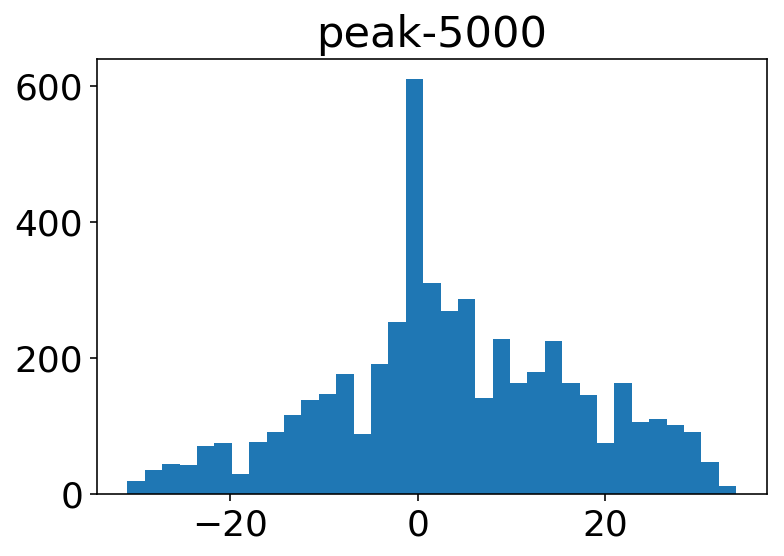

In [69]:
%config InlineBackend.figure_format = 'retina'
import matplotlib
matplotlib.rcParams.update({'font.size': 18})
plt.title("peak-5000")
plt.hist(peak_diff,35)

## calculate the ks value 

In [87]:
ks=[]
for i in my_range(0, 499, 1):
        listdate=[]
        for j in range(0,len(times[key_list[i]])):
            a=float(times[key_list[i]][j])
            listdate.append(datetime.fromtimestamp(a))
        X=[]
        for k in range(0,len(times[key_list[i]])):
            if(listdate[k].month==9):
                value=listdate[k].day-17
            else:
                value=listdate[k].day+13
            X.append(value) 
        unique, counts = np.unique(X, return_counts=True)
        ww2=dict(zip(unique, counts))
        list_ww=list(ww2.values())
        ks_a, ks_p = stats.kstest(list_ww, lambda x: (x-min(list_ww)) / (max(list_ww)-min(list_ww)))
        ks.append(ks_a)

In [88]:
ks[200]

0.4421329507412721

In [89]:
for i in my_range(500, 999, 1):
        listdate=[]
        for j in range(0,len(times[key_list[i]])):
            a=float(times[key_list[i]][j])
            listdate.append(datetime.fromtimestamp(a))
        X=[]
        for k in range(0,len(times[key_list[i]])):
            if(listdate[k].month==9):
                value=listdate[k].day-17
            else:
                value=listdate[k].day+13
            X.append(value) 
        unique, counts = np.unique(X, return_counts=True)
        ww2=dict(zip(unique, counts))
        list_ww=list(ww2.values())
        ks_a, ks_p = stats.kstest(list_ww, lambda x: (x-min(list_ww)) / (max(list_ww)-min(list_ww)))
        ks.append(ks_a)

In [115]:
np.mean(ks)

0.40805142613215023

(array([ 32., 152., 251., 212., 154., 111.,  44.,  28.,  10.,   6.]),
 array([0.11675579, 0.19832336, 0.27989093, 0.36145851, 0.44302608,
        0.52459365, 0.60616122, 0.68772879, 0.76929636, 0.85086393,
        0.9324315 ]),
 <a list of 10 Patch objects>)

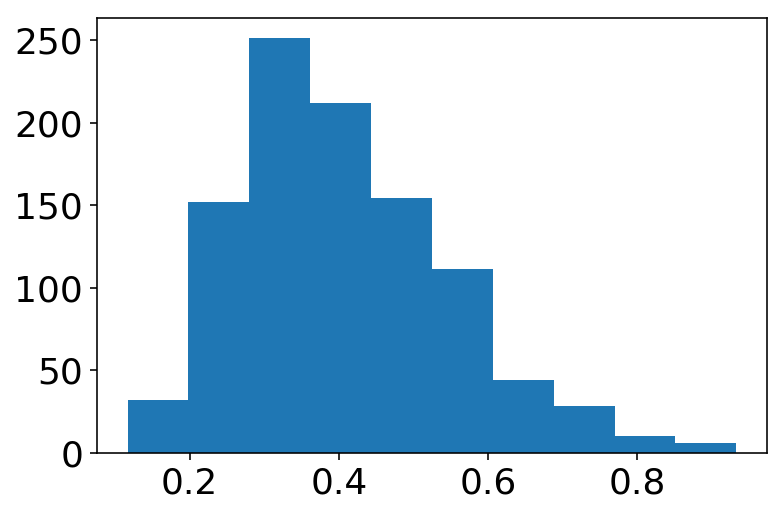

In [91]:
plt.hist(ks)

In [92]:
word=[]
for i in range(0,1000):
     if(ks[i]>0.7):
        word.append(key_list[i])  

In [116]:
word

['October_15',
 'Gobi_Desert',
 "Radiohead's_seventh_studio_album",
 'Philippine-American_War',
 'PlayStation_2',
 'October_12',
 'Yom_Kippur_War',
 'Magna_Carta',
 'October_16',
 'Portia_de_Rossi',
 'Clitoris',
 'Harry_S._Truman',
 'Playboy_Special_Edition',
 'F-14_Tomcat',
 'Orion_%28mythology%29',
 'Neptune',
 'Yemen',
 'Marc_Ecko',
 'England_national_rugby_union_team',
 'United_states',
 'WWE_No_Mercy',
 'Saffron',
 'O._J._Simpson_murder_case',
 'Intersex',
 'Harry_Potter_and_the_Half-Blood_Prince_(film)',
 'Manny_Pacquiao',
 'October_2',
 'F-16_Fighting_Falcon',
 'Jos%C3%A9_Mourinho',
 'Chronic_fatigue_syndrome',
 'B-29_Superfortress',
 'Guinea_pig',
 'Smallville_%28TV_series%29',
 'Ponzi_scheme',
 'Ontario_general_election,_2007',
 'Methicillin-resistant_Staphylococcus_aureus']

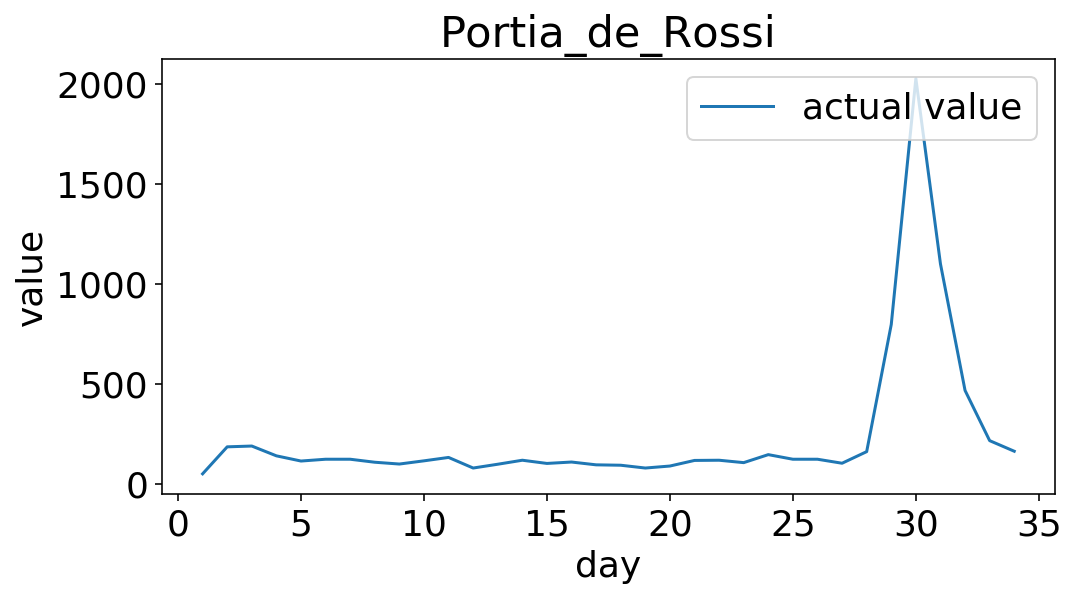

In [117]:
listdate=[]
for i in range(0,len(times["Portia_de_Rossi"])):
    a=float(times["Portia_de_Rossi"][i])
    listdate.append(datetime.fromtimestamp(a))
X=[]
for i in range(0,len(times["Portia_de_Rossi"])):
    if(listdate[i].month==9):
        value=listdate[i].day-17
    else:
        value=listdate[i].day+13
    X.append(value) 
unique, counts = np.unique(X, return_counts=True)
ww2=dict(zip(unique, counts))
list_ww=list(ww2.values())
xlabel=[]
for i in range(0,34):
    xlabel.append(i+1)
plt.figure(figsize=(8,4)) 
l1, = plt.plot(xlabel, list_ww, label='actual value')
#l2, = plt.plot(xlabel, list_ww_update, color='red', linewidth=1.0, linestyle='--', label='prediction value')
plt.xlabel("day")
plt.ylabel("value")
plt.legend(loc='upper right')
plt.title("Portia_de_Rossi")
plt.show() 

In [118]:
list_ww

[49,
 184,
 188,
 139,
 113,
 122,
 122,
 107,
 98,
 114,
 131,
 78,
 97,
 117,
 101,
 108,
 94,
 92,
 78,
 88,
 116,
 117,
 105,
 145,
 122,
 122,
 102,
 160,
 796,
 2026,
 1099,
 466,
 215,
 162]

In [93]:
word

['October_15',
 'Gobi_Desert',
 "Radiohead's_seventh_studio_album",
 'Philippine-American_War',
 'PlayStation_2',
 'October_12',
 'Yom_Kippur_War',
 'Magna_Carta',
 'October_16',
 'Portia_de_Rossi',
 'Clitoris',
 'Harry_S._Truman',
 'Playboy_Special_Edition',
 'F-14_Tomcat',
 'Orion_%28mythology%29',
 'Neptune',
 'Yemen',
 'Marc_Ecko',
 'England_national_rugby_union_team',
 'United_states',
 'WWE_No_Mercy',
 'Saffron',
 'O._J._Simpson_murder_case',
 'Intersex',
 'Harry_Potter_and_the_Half-Blood_Prince_(film)',
 'Manny_Pacquiao',
 'October_2',
 'F-16_Fighting_Falcon',
 'Jos%C3%A9_Mourinho',
 'Chronic_fatigue_syndrome',
 'B-29_Superfortress',
 'Guinea_pig',
 'Smallville_%28TV_series%29',
 'Ponzi_scheme',
 'Ontario_general_election,_2007',
 'Methicillin-resistant_Staphylococcus_aureus']

## calculate the significant peak 

In [100]:
peak_visit=[]

In [101]:
for i in my_range(0, len(word)-1, 1):
        listdate=[]
        for j in range(0,len(times[word[i]])):
            a=float(times[word[i]][j])
            listdate.append(datetime.fromtimestamp(a))
        X=[]
        for k in range(0,len(times[word[i]])):
            if(listdate[k].month==9):
                value=listdate[k].day-17
            else:
                value=listdate[k].day+13
            X.append(value) 
        unique, counts = np.unique(X, return_counts=True)
        ww2=dict(zip(unique, counts))
        list_ww=list(ww2.values())
        visit_max=max(ww2.items(), key=operator.itemgetter(1))[0]
        peak_visit.append(visit_max)

In [102]:
peak_update=[]

In [104]:
for i in my_range(0, len(word)-1, 1):
    if(word[i] in revisions_record.index): 
        length=len(revisions_record.loc[word[i],'timestamp'])
        update_list=[]
        for j in range(0,int(length)):
            a=revisions_record.loc[word[i],'timestamp'][j]
            update_list.append(datetime.fromtimestamp(a))
        update_X=[]
        for k in range(0,int(length)):
            if(update_list[k].month==9):
                value=update_list[k].day-17
            else:
                value=update_list[k].day+13
            update_X.append(value) 
        unique, counts = np.unique(update_X, return_counts=True)
        ww2_update=dict(zip(unique, counts))
        update_max=max(ww2_update.items(), key=operator.itemgetter(1))[0]
        peak_update.append(update_max)
    else:
        peak_update.append(0)

In [105]:
peak_diff=[]

In [106]:
for i in my_range(0, len(word)-1, 1):
    diff=peak_visit[i]-peak_update[i]
    peak_diff.append(diff)

(array([6., 2., 3., 7., 3., 7., 5., 1., 1., 1.]),
 array([-20. , -14.9,  -9.8,  -4.7,   0.4,   5.5,  10.6,  15.7,  20.8,
         25.9,  31. ]),
 <a list of 10 Patch objects>)

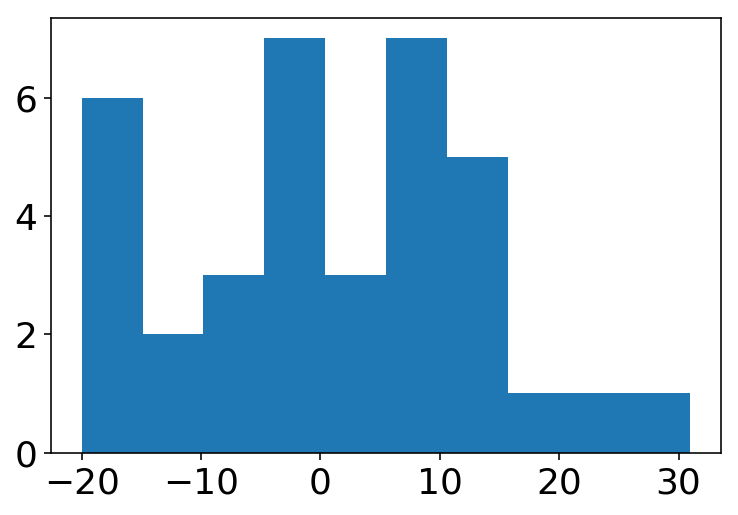

In [111]:
plt.hist(peak_diff)

In [108]:
peak_visit

[28,
 4,
 23,
 8,
 21,
 25,
 19,
 9,
 29,
 30,
 20,
 2,
 24,
 16,
 18,
 6,
 14,
 9,
 33,
 1,
 21,
 12,
 2,
 4,
 33,
 20,
 15,
 28,
 3,
 31,
 4,
 21,
 10,
 3,
 24,
 31]

In [76]:
hotwords=pd.read_csv('./data/revisions/hot_10000.csv',sep='	')
hotwords.sort_values(by=['frequency'],ascending=False,inplace=True)

In [77]:
hotwords

,entry,frequency
8957,Wiki,444697
4032,World_War_II,63815
2164,Hard_disk,61565
3360,Heroes,55509
4660,Heroes,55509
8033,Data_(Star_Trek),54397
7598,Super_Smash_Bros._Brawl,44364
9004,Che_Guevara,40104
5406,Blackwater_USA,38982
3139,Blackwater_USA,38982


In [17]:
word

['Diabetes',
 'The_Death_of_Superman',
 'United_States_presidential_election,_2008',
 'Saw_III',
 'Longitude',
 'Hurricane',
 'Adjective',
 'Mexican-American_War',
 'Fifa_08',
 'Hillary_Clinton',
 'United_States_Senate',
 'Jodie_Foster',
 'Vector_graphics',
 'Taylor_series',
 'Cannabis_(drug)',
 'War_in_Iraq',
 'Karrine_Steffans',
 'Paul_Revere',
 'Wes_Anderson',
 'Goosebumps',
 'Phentermine',
 'South_America',
 'Samhain',
 'Adam_Smith',
 'Failure',
 'Continent',
 'Niels_Bohr',
 'Conference_calls',
 'Circulatory_system',
 'Chinese_New_Year',
 'History_of_the_Internet',
 'MSN_Hotmail',
 'Isotope',
 'First_Amendment',
 'List_of_Goosebumps_books',
 'Flight_of_the_Conchords',
 'America%27s_next_top_model']

In [ ]:
len(times["New_York"])

In [ ]:
len(times)

In [ ]:
float(times["New_York"][0])

In [ ]:
listdate=[]
a=float(times["New_York"][0])
datetime.fromtimestamp(a)
listdate.append(datetime.fromtimestamp(a))

In [ ]:
listdate[0].month

In [ ]:
len(times.keys())

In [ ]:
listdate=[]
for i in range(0,len(times["New_York"])):
    a=float(times["New_York"][i])
    listdate.append(datetime.fromtimestamp(a))

In [ ]:
start=datetime.fromtimestamp(1190146243)
end=datetime.fromtimestamp(1192994591)

In [ ]:
start

In [ ]:
end

In [ ]:
listdate

In [ ]:
X=[]
for i in range(0,len(times["New_York"])):
    if(listdate[i].month==9):
        value=listdate[i].day-17
    else:
        value=listdate[i].day+13
    X.append(value)      

In [ ]:
X.sort()

In [ ]:
np.var(X)

In [ ]:
plt.hist(X,34)

In [ ]:
hotwords=pd.read_csv('./data/revisions/hot_10000.csv',sep='	')
hotwords.sort_values(by=['frequency'],ascending=False,inplace=True)

In [ ]:
times["World_War_II"]

In [ ]:
hotwords

In [22]:
listdate=[]
for i in range(0,len(times["World_War_II"])):
    a=float(times["World_War_II"][i])
    listdate.append(datetime.fromtimestamp(a))

In [23]:
X=[]
for i in range(0,len(times["World_War_II"])):
    if(listdate[i].month==9):
        value=listdate[i].day-17
    else:
        value=listdate[i].day+13
    X.append(value) 

(array([ 290., 2087., 1789., 1587., 5300., 2079., 5348., 2263., 2046.,
        2171., 1588., 1258., 1708., 2229., 2426., 2315., 2089., 1891.,
        1229., 1461., 2051., 2171., 1877., 2147., 1659., 1231., 1592.,
        2114., 2278., 2062., 2075., 1754., 1195., 1000.]),
 array([ 1.        ,  1.97058824,  2.94117647,  3.91176471,  4.88235294,
         5.85294118,  6.82352941,  7.79411765,  8.76470588,  9.73529412,
        10.70588235, 11.67647059, 12.64705882, 13.61764706, 14.58823529,
        15.55882353, 16.52941176, 17.5       , 18.47058824, 19.44117647,
        20.41176471, 21.38235294, 22.35294118, 23.32352941, 24.29411765,
        25.26470588, 26.23529412, 27.20588235, 28.17647059, 29.14705882,
        30.11764706, 31.08823529, 32.05882353, 33.02941176, 34.        ]),
 <a list of 34 Patch objects>)

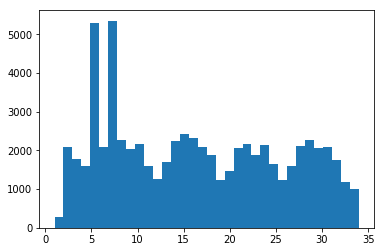

In [24]:
plt.hist(X,34)

## No possion distribution, 
On Sep 23, there comes a new mini series "The War", so the visits increase.

In [ ]:
np.var(X)

In [25]:
unique, counts = np.unique(X, return_counts=True)
ww2=dict(zip(unique, counts))

In [26]:
list_ww=list(ww2.values())

In [27]:
list_ww

[290,
 2087,
 1789,
 1587,
 5300,
 2079,
 5348,
 2263,
 2046,
 2171,
 1588,
 1258,
 1708,
 2229,
 2426,
 2315,
 2089,
 1891,
 1229,
 1461,
 2051,
 2171,
 1877,
 2147,
 1659,
 1231,
 1592,
 2114,
 2278,
 2062,
 2075,
 1754,
 1195,
 1000]

In [29]:
from scipy import stats
a,b=stats.kstest(list_ww, lambda x: (x-290) / (5000))

In [30]:
a

0.5139764705882353

In [ ]:
revisions_record = load_data('data/revisions/revision_records.pkl')

In [ ]:
revisions_record["World_War_II"][0]

In [ ]:
length=len(revisions_record["World_War_II"])/5
update_list=[]
for i in range(0,int(length)):
    a=revisions_record["World_War_II"][i].timestamp
    update_list.append(datetime.fromtimestamp(a))

In [ ]:
update_list

In [ ]:
update_X=[]
for i in range(0,int(length)):
    if(update_list[i].month==9):
        value=update_list[i].day-17
    else:
        value=update_list[i].day+13
    update_X.append(value) 

In [ ]:
len(update_X)

In [ ]:
unique, counts = np.unique(update_X, return_counts=True)
ww2_update=dict(zip(unique, counts))

In [ ]:
ww2_update

In [ ]:
xlabel=[]
for i in range(0,34):
    xlabel.append(i+1)

In [ ]:
plt.figure(figsize=(8,4)) 
l1, = plt.plot(xlabel, list_ww, label='actual value')
#l2, = plt.plot(xlabel, list_ww_update, color='red', linewidth=1.0, linestyle='--', label='prediction value')
plt.xlabel("day")
plt.ylabel("value")
plt.legend(loc='upper right')
plt.title("World War II")
plt.show() 

In [ ]:

plt.figure(figsize=(8,4)) 
#l1, = plt.plot(xlabel, list_ww, label='actual value')
l2, = plt.plot(ww2_update.keys(), ww2_update.values(), color='red', linewidth=1.0, linestyle='--', label='prediction value')
plt.xlabel("day")
plt.ylabel("value")
plt.legend(loc='upper right')
plt.title("World War II")
plt.show() 

## revision update

In [9]:
revisions_record = load_data('data/dump/revision_records.pkl')

In [49]:
length=len(revisions_record.loc['Batman','timestamp'])
update_list=[]
for i in range(0,int(length)):
    a=revisions_record.loc['Batman','timestamp'][i]
    update_list.append(datetime.fromtimestamp(a))
update_X=[]
for i in range(0,int(length)):
    if(update_list[i].month==9):
        value=update_list[i].day-17
    else:
        value=update_list[i].day+13
    update_X.append(value) 
unique, counts = np.unique(update_X, return_counts=True)
ww2_update=dict(zip(unique, counts))

In [56]:
update_max=max(ww2_update.items(), key=operator.itemgetter(1))[0]

In [68]:
sd = sorted(ww2_update.items())
x = [item[0] for item in sd]
y = [item[1] for item in sd]

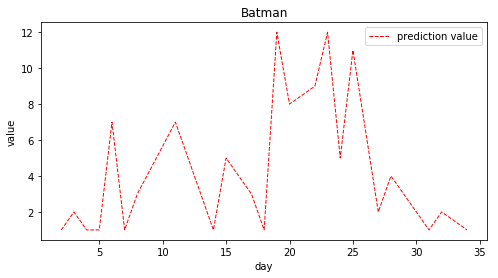

In [51]:
plt.figure(figsize=(8,4)) 
#l1, = plt.plot(xlabel, list_ww, label='actual value')
l2, = plt.plot(x, y, color='red', linewidth=1.0, linestyle='--', label='prediction value')
plt.xlabel("day")
plt.ylabel("value")
plt.legend(loc='upper right')
plt.title("Batman")
plt.show() 

## visits 

In [81]:
listdate=[]
for i in range(0,len(times["Batman"])):
    a=float(times["Batman"][i])
    listdate.append(datetime.fromtimestamp(a))
X=[]
for i in range(0,len(times["Batman"])):
    if(listdate[i].month==9):
        value=listdate[i].day-17
    else:
        value=listdate[i].day+13
    X.append(value) 
unique, counts = np.unique(X, return_counts=True)
ww2=dict(zip(unique, counts))
list_ww=list(ww2.values())

In [82]:
vist_max=max(ww2.items(), key=operator.itemgetter(1))[0]

In [94]:
valuesorted=sorted(ww2.items(),key=lambda item:item[1])

In [104]:
f1=valuesorted[len(valuesorted)-1][0]
f2=valuesorted[len(valuesorted)-2][0]

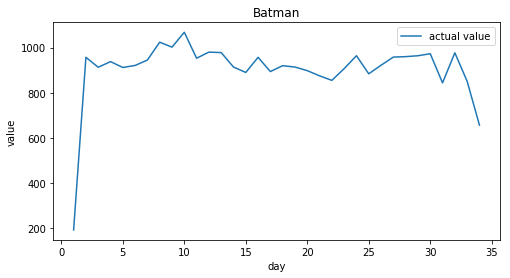

In [92]:
xlabel=[]
for i in range(0,34):
    xlabel.append(i+1)
plt.figure(figsize=(8,4)) 
l1, = plt.plot(xlabel, list_ww, label='actual value')
#l2, = plt.plot(xlabel, list_ww_update, color='red', linewidth=1.0, linestyle='--', label='prediction value')
plt.xlabel("day")
plt.ylabel("value")
plt.legend(loc='upper right')
plt.title("Batman")
plt.show() 